# Overview 



This notebook will demonstrate scRNA-seq preprocessing using data from hematopoiesis. (Paul, F., Arkin, Y., Giladi, A., Jaitin, D. A., Kenigsberg, E., Keren-Shaul, H., et al. (2015). Transcriptional Heterogeneity and Lineage Commitment in Myeloid Progenitors. Cell, 163(7), 1663–1677. http://doi.org/10.1016/j.cell.2015.11.013).

You can easily download this scRNA-seq data using Scanpy.

### Notebook file
Notebook file is available on CellOracle's GitHub page.
https://github.com/morris-lab/CellOracle/blob/master/docs/notebooks/03_scRNA-seq_data_preprocessing/scanpy_preprocessing_with_Paul_etal_2015_data.ipynb


### Steps

To preprocess the scRNA-seq data, we will do the following:

1. **Variable gene selection and normalization.**
2. **Log transformation.**  Like many preprocessing workflows, we need to log transform the data. However, CellOracle also needs the raw gene expression values, which we will store in an anndata layer.
3. **Cell clustering.** 
4. **Dimensional reduction.** We need to prepare the 2D embedding data. Please make sure that the 2D embedding properly represents the cell identities and processes of interest. Also, please consider the resolution and continuity of the data. CellOracle’s simulation results are only informative when the embedding is consistent with the questions being investigated.


### Caution

- This notebook is intended to help users **prepare the input data for CellOracle analysis**. This is **NOT** the CellOracle analysis itself. Also, this notebook does NOT use `celloracle` in this notebook.

- Instead, we use `Scanpy` and `Anndata` to process and store the scRNA-seq data. If you are new to these packages, please learn about them in advance.  

 - `Scanpy` documentation: https://scanpy.readthedocs.io/en/stable/
 - `Anndata` documentation: https://anndata.readthedocs.io/en/latest/


### Acknowledgement

- This scRNA-seq preprocessing notebook was made based on the Scanpy's tutorial.
https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html

# 0. Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import celloracle as co
import anndata as ad

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

# 1. Load data


In [3]:
# Download dataset. You can change the code blow to use your data.
adata = co.data_conversion.seurat_object_to_anndata("jinlab/ctxobj.rds",
                                                    delete_tmp_file=True)

input file name: jinlab/ctxobj.rds


Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

loading seurat object ...
  seurat object version is 4x
Processing an assay: RNA
Processing an assay: Crispr


making AnnData ...
2 assays found in the seurat object.
Data is exported as multiple files.
If the seurat object was made by integrating multiple files, please be careful about 'Simpson's effect' in the inferred GRN.
Go to CellOracle web documentation for detailed information about this issue.


In [4]:
adata['Crispr']

AnnData object with n_obs × n_vars = 11471 × 17
    obs: 'Name', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scds', 'cxds', 'bcds', 'RNA_snn_res.0.8', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'feature_call', 'num_features', 'num_umis', 'nCount_Crispr', 'nFeature_Crispr', 'RNA_snn_res.1.5', 'lowQC', 'CellType', 'Perc', 'CBC', 'antisense', 'intergenic', 'intronic', 'exonic', 'multi', 'unmapped', 'highConf', 'polyA', 'TSO', 'spliced', 'percent_qual_cbc', 'percent_qual_umi', 'nUMI', 'UTR', 'total', 'Rem', 'CellType_Gen', 'Mito', 'demux_type', 'assignment', 'Keep', 'Max', 'MaxVal', 'SecMaxVal', 'demuxHC', 'demuxCR', 'demuxDS', 'assignDS', 'pertgene', 'active_ident'
    var: 'variable_gene'
    uns: 'RNA_snn_res.0.8_colors', 'seurat_clusters_colors', 'active_ident_colors'
    obsm: 'X_umap', 'X_pca', 'X_gbm'
    layers: 'raw_count'

In [5]:
adata['RNA']

AnnData object with n_obs × n_vars = 11471 × 32285
    obs: 'Name', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scds', 'cxds', 'bcds', 'RNA_snn_res.0.8', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'feature_call', 'num_features', 'num_umis', 'nCount_Crispr', 'nFeature_Crispr', 'RNA_snn_res.1.5', 'lowQC', 'CellType', 'Perc', 'CBC', 'antisense', 'intergenic', 'intronic', 'exonic', 'multi', 'unmapped', 'highConf', 'polyA', 'TSO', 'spliced', 'percent_qual_cbc', 'percent_qual_umi', 'nUMI', 'UTR', 'total', 'Rem', 'CellType_Gen', 'Mito', 'demux_type', 'assignment', 'Keep', 'Max', 'MaxVal', 'SecMaxVal', 'demuxHC', 'demuxCR', 'demuxDS', 'assignDS', 'pertgene', 'active_ident'
    var: 'variable_gene'
    uns: 'RNA_snn_res.0.8_colors', 'seurat_clusters_colors', 'active_ident_colors'
    obsm: 'X_umap', 'X_pca', 'X_gbm'
    layers: 'raw_count'

In [ ]:
adata['Crispr'].obs

In [8]:
adata['Crispr'].obs['assignDS'].value_counts()

Tcf4_2        1043
GFP            918
Foxg1_1        889
NonTarget1     845
Tcf4_3         827
Nr2f1_3        792
Tbr1_1         792
SafeTarget     781
NonTarget2     712
Nr2f1_1        702
Foxg1_2        689
Tcf4_1         613
Foxg1_3        556
Nr2f1_2        522
Tbr1_3         477
Tbr1_2         313
Name: assignDS, dtype: int64

In [6]:
control = ['NonTarget1', 'NonTarget2', 'SafeTarget']
ctrl_adata = adata['RNA'][adata['RNA'].obs['assignDS'].isin(control)].copy()

In [8]:
ctrl_adata.obs['predicted.subclass'].value_counts()

L6 CT CTX        698
CR               236
L6 IT CTX        211
L5 NP CTX        166
L5 IT CTX        127
L5 IT TPE-ENT    127
L5 PT CTX        106
Sst               97
Pvalb             90
L2/3 IT CTX-1     81
L6b/CT ENT        78
L2 IT ENTl        72
L6b CTX           58
L2/3 IT CTX-2     47
L4/5 IT CTX       40
NP SUB            22
Car3              21
L6 IT ENTl        19
L2/3 IT ENTl       8
Sncg               7
Lamp5              7
Vip                5
L2 IT RHP          4
L3 IT ENT          3
L2/3 IT PPP        2
Oligo              2
CA2                1
Sst Chodl          1
CT SUB             1
Astro              1
Name: predicted.subclass, dtype: int64

In [ ]:
ctrl_adata.obs

In [5]:
raw_count_layer = adata['RNA'].layers['raw_count']

new_adata = ad.AnnData(
    X=raw_count_layer,
    obs=adata['RNA'].obs.copy(),
    var=adata['RNA'].var.copy()
)



In [15]:
adata['RNA'].to_df()['Rgs20']

Ch1_AAACCTGTCAGGTTCA-1    4.047692
Ch1_AAACCTGTCCTTTACA-1    0.000000
Ch1_AAACGGGCACAGGAGT-1    0.000000
Ch1_AAACGGGCATGCAATC-1    4.012677
Ch1_AAACGGGGTAATAGCA-1    0.000000
                            ...   
Ch5_TTTGGTTGTTCACGGC-1    0.000000
Ch5_TTTGGTTTCGAACGGA-1    4.070345
Ch5_TTTGGTTTCTTTACGT-1    3.977295
Ch5_TTTGTCAGTTGACGTT-1    0.000000
Ch5_TTTGTCATCTACTTAC-1    0.000000
Name: Rgs20, Length: 11471, dtype: float32

In [6]:
new_adata

AnnData object with n_obs × n_vars = 11471 × 32285
    obs: 'Name', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scds', 'cxds', 'bcds', 'RNA_snn_res.0.8', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'feature_call', 'num_features', 'num_umis', 'nCount_Crispr', 'nFeature_Crispr', 'RNA_snn_res.1.5', 'lowQC', 'CellType', 'Perc', 'CBC', 'antisense', 'intergenic', 'intronic', 'exonic', 'multi', 'unmapped', 'highConf', 'polyA', 'TSO', 'spliced', 'percent_qual_cbc', 'percent_qual_umi', 'nUMI', 'UTR', 'total', 'Rem', 'CellType_Gen', 'Mito', 'demux_type', 'assignment', 'Keep', 'Max', 'MaxVal', 'SecMaxVal', 'demuxHC', 'demuxCR', 'demuxDS', 'assignDS', 'pertgene', 'active_ident'
    var: 'variable_gene'

# 2. Filtering

In [7]:
# Only consider genes with more than 1 count
sc.pp.filter_genes(new_adata, min_counts=1)


# 3. Normalization

In [8]:
# Normalize gene expression matrix with total UMI count per cell
sc.pp.normalize_per_cell(new_adata, key_n_counts='nCount_RNA')

In [9]:
new_adata.to_df()

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Gm37323,Mrpl15,Lypla1,Tcea1,Rgs20,...,Vmn2r122,CR974586.2,CR974586.4,4933409K07Rik,Ccl27a.2,Gm10931,CT868723.1,CAAA01147332.1,AC163611.2,AC149090.1
Ch1_AAACCTGTCAGGTTCA-1,1.555393,0.000000,0.000000,0.0,0.0,0.0,0.777697,0.777697,2.333090,0.777697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333090,0.0,1.555393
Ch1_AAACCTGTCCTTTACA-1,3.698029,0.000000,0.000000,0.0,0.0,0.0,1.232676,0.000000,2.465353,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Ch1_AAACGGGCACAGGAGT-1,0.000000,2.532894,2.532894,0.0,0.0,0.0,0.000000,2.532894,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.532894,0.0,2.532894
Ch1_AAACGGGCATGCAATC-1,3.752308,0.750462,0.000000,0.0,0.0,0.0,0.750462,0.000000,2.251384,0.750462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.500923
Ch1_AAACGGGGTAATAGCA-1,1.320279,1.320279,0.000000,0.0,0.0,0.0,2.640558,1.320279,1.320279,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ch5_TTTGGTTGTTCACGGC-1,1.902023,0.951011,0.000000,0.0,0.0,0.0,2.853034,1.902023,2.853034,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951011,0.0,0.951011
Ch5_TTTGGTTTCGAACGGA-1,3.979157,0.795831,0.000000,0.0,0.0,0.0,1.591663,0.795831,3.979157,0.795831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795831,0.0,0.000000
Ch5_TTTGGTTTCTTTACGT-1,0.723892,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.723892,0.723892,0.723892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.447785,0.0,0.723892
Ch5_TTTGTCAGTTGACGTT-1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.834651,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


# 4. Identification of highly variable genes

**This step is essential. Please do not skip this step.**

> Removing non-variable genes reduces the calculation time during the GRN reconstruction and simulation steps.
It also improves the overall accuracy of the GRN inference by removing noisy genes.
We recommend using the top 2000~3000 variable genes. 

In [10]:
# Select top 2000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(new_adata.X,
                                              flavor='cell_ranger',
                                              n_top_genes=2000,
                                              log=False)

# Subset the genes
new_adata = new_adata[:, filter_result.gene_subset]

# Renormalize after filtering
sc.pp.normalize_per_cell(new_adata)

# 5. Log transformation
- •	We need to log transform and scale the data before we calculate the principal components, clusters, and differentially expressed genes.


- We also need to **keep the non-transformed gene expression data in a separate anndata layer** before the log transformation. We will use this data for celloracle analysis later. 


In [11]:
# keep raw cont data before log transformation
new_adata.raw = new_adata
new_adata.layers["raw_count"] = new_adata.raw.X.copy()


# Log transformation and scaling
sc.pp.log1p(new_adata)
sc.pp.scale(new_adata)

In [12]:
new_adata.to_df()

,Rgs20,Oprk1,St18,Sntg1,Vxn,Cpa6,A830018L16Rik,Sulf1,Eya1,Kcnb2,...,Frmpd4,Amelx,Mid1,Eif2s3y,Gm28102,mt-Co1,mt-Co2,mt-Atp6,mt-Co3,mt-Cytb
Ch1_AAACCTGTCAGGTTCA-1,0.786378,-0.211213,-0.082391,1.356291,0.653978,-0.174966,-0.456788,-0.305881,-0.226017,-0.775718,...,0.508391,-0.051206,-0.304968,-0.503308,-0.011955,-0.366771,-0.448173,-0.219606,0.000422,0.807242
Ch1_AAACCTGTCCTTTACA-1,-0.565052,-0.211213,-0.082391,1.634362,1.202041,-0.174966,1.002937,2.533964,-0.226017,1.127313,...,0.824266,-0.051206,-0.304968,3.332138,-0.011955,1.213417,0.859442,1.861873,0.550665,0.983374
Ch1_AAACGGGCACAGGAGT-1,-0.565052,-0.211213,-0.082391,-0.952358,-0.582888,-0.174966,-1.278037,-0.305881,4.394950,0.152512,...,-1.478509,-0.051206,-0.304968,-0.503308,-0.011955,-0.151217,0.384518,0.634869,-0.202016,0.913046
Ch1_AAACGGGCATGCAATC-1,0.641809,-0.211213,-0.082391,1.691224,0.521665,-0.174966,-0.544641,-0.305881,-0.226017,0.191030,...,0.205398,-0.051206,-0.304968,-0.503308,-0.011955,0.036730,0.643128,1.769199,0.385656,0.873452
Ch1_AAACGGGGTAATAGCA-1,-0.565052,3.649865,-0.082391,0.429664,-0.582888,-0.174966,0.597823,-0.305881,-0.226017,-0.412230,...,1.051794,-0.051206,-0.304968,-0.503308,-0.011955,0.402973,0.074079,0.160878,0.288959,0.246198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ch5_TTTGGTTGTTCACGGC-1,-0.565052,-0.211213,-0.082391,-0.952358,1.850263,-0.174966,0.337515,2.136461,-0.226017,-0.049234,...,0.399646,-0.051206,-0.304968,-0.503308,-0.011955,0.451316,0.089880,-0.193550,-0.236106,0.622773
Ch5_TTTGGTTTCGAACGGA-1,0.867888,-0.211213,-0.082391,0.651223,0.728578,-0.174966,1.100409,-0.305881,-0.226017,-1.526847,...,0.867158,-0.051206,-0.304968,1.874394,-0.011955,-0.067790,-0.060201,-0.189783,0.339069,0.397736
Ch5_TTTGGTTTCTTTACGT-1,0.675833,-0.211213,-0.082391,-0.097209,-0.582888,-0.174966,-1.278037,-0.305881,-0.226017,1.330945,...,0.404290,-0.051206,-0.304968,-0.503308,-0.011955,0.008367,-0.321517,0.327286,-0.561337,-0.843570
Ch5_TTTGTCAGTTGACGTT-1,-0.565052,-0.211213,-0.082391,-0.952358,-0.582888,-0.174966,-1.278037,-0.305881,4.060895,1.192967,...,-1.478509,-0.051206,-0.304968,-0.503308,-0.011955,0.289228,-1.033365,0.366334,0.124365,0.123229


# 6. PCA and neighbor calculations
These calculations are necessary to perform the dimensionality reduction and clustering steps.

In [36]:
# PCA
sc.tl.pca(new_adata, svd_solver='arpack')

# Diffusion map
sc.pp.neighbors(new_adata, n_neighbors=4, n_pcs=20)

sc.tl.diffmap(new_adata)
# Calculate neihbors again based on diffusionmap 
sc.pp.neighbors(new_adata, n_neighbors=10, use_rep='X_diffmap')

# 7. Cell clustering

In [37]:
sc.tl.louvain(new_adata, resolution=0.8)

# 8. Dimensionality reduction using PAGA and force-directed graphs

The dimensionality reduction step requires careful consideration when preparing data for a CellOracle analysis. For a successful analysis, the embedding should recapitulate the cellular transition of interest.

Please choose an algorithm that can accurately represent the developmental trajectory of your data. We recommend using one of the following dimensional reduction algorithms (or trajectory inference algorithms).
 - UMAP: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html#scanpy.tl.umap
 - TSNE: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.tsne.html#scanpy.tl.tsne
 - Diffusion map: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.diffmap.html#scanpy.tl.diffmap
 - Force-directed graph drawing: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.draw_graph.html#scanpy.tl.draw_graph
 

In this example, we use the workflow introduced in the scanpy trajectory inference tutorial. https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html This method uses a combination of three algorithms:diffusion map, force-directed graph, and PAGA.
- Step1: Calculate the PAGA graph.The PAGA data will determine the initial cluster positions for the force-directed graph calculation.
- Step2: Calculate the force-directed graph. 



In [55]:
new_adata.obs['CellType']

Ch1_AAACCTGTCAGGTTCA-1        Excit_L5IT
Ch1_AAACCTGTCCTTTACA-1       Excit_Upper
Ch1_AAACGGGCACAGGAGT-1                CR
Ch1_AAACGGGCATGCAATC-1        Excit_L5IT
Ch1_AAACGGGGTAATAGCA-1        Excit_L6IT
                               ...      
Ch5_TTTGGTTGTTCACGGC-1    Excit_L6CT_CTX
Ch5_TTTGGTTTCGAACGGA-1    Excit_L6CT_CTX
Ch5_TTTGGTTTCTTTACGT-1        Excit_L5IT
Ch5_TTTGTCAGTTGACGTT-1                CR
Ch5_TTTGTCATCTACTTAC-1       Excit_Upper
Name: CellType, Length: 11471, dtype: category
Categories (14, object): ['CR', 'Excit_Car3', 'Excit_L2 IT ENTl', 'Excit_L5 PT CTX', ..., 'Excit_Upper', 'Inhib_Id2', 'Inhib_Lhx6+Sst-', 'Inhib_Sst']

In [38]:

# PAGA graph construction
sc.tl.paga(new_adata, groups='louvain')

... storing 'Name' as categorical
... storing 'orig.ident' as categorical
... storing 'predicted.subclass' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'CellType' as categorical
... storing 'CBC' as categorical
... storing 'CellType_Gen' as categorical
... storing 'demux_type' as categorical
... storing 'assignment' as categorical
... storing 'Max' as categorical
... storing 'demuxHC' as categorical
... storing 'demuxCR' as categorical
... storing 'demuxDS' as categorical
... storing 'assignDS' as categorical
... storing 'pertgene' as categorical


In [48]:
plt.rcParams["figure.figsize"] = [6, 4.5]

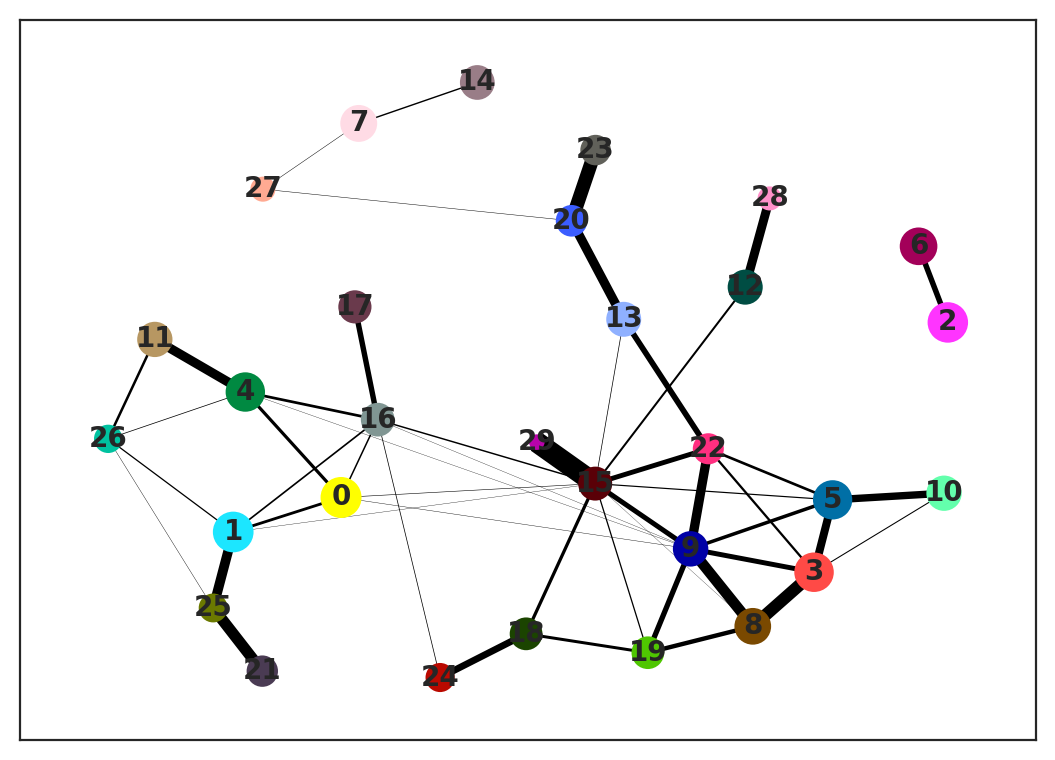

In [54]:
sc.pl.paga(new_adata)

In [58]:
sc.tl.umap(new_adata)

In [56]:
sc.tl.draw_graph(new_adata, init_pos='umap', random_state=123)

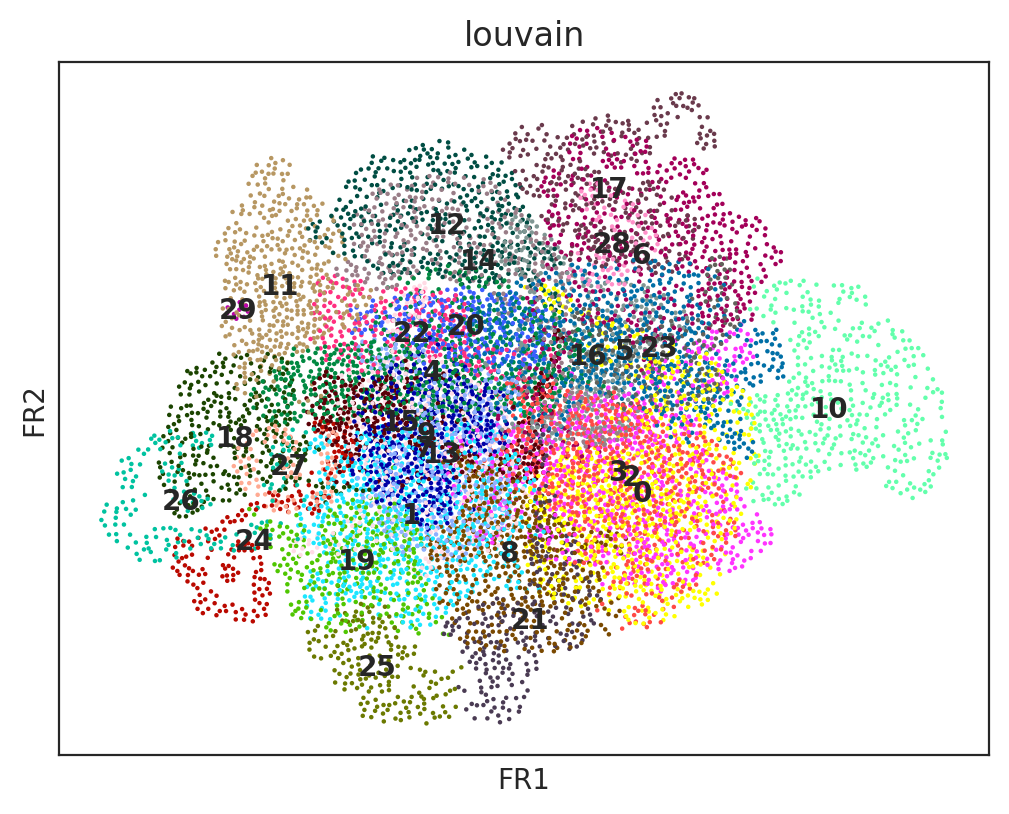

In [57]:
sc.pl.draw_graph(new_adata, color='louvain', legend_loc='on data')

In [27]:
new_adata

AnnData object with n_obs × n_vars = 11471 × 2000
    obs: 'Name', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scds', 'cxds', 'bcds', 'RNA_snn_res.0.8', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'feature_call', 'num_features', 'num_umis', 'nCount_Crispr', 'nFeature_Crispr', 'RNA_snn_res.1.5', 'lowQC', 'CellType', 'Perc', 'CBC', 'antisense', 'intergenic', 'intronic', 'exonic', 'multi', 'unmapped', 'highConf', 'polyA', 'TSO', 'spliced', 'percent_qual_cbc', 'percent_qual_umi', 'nUMI', 'UTR', 'total', 'Rem', 'CellType_Gen', 'Mito', 'demux_type', 'assignment', 'Keep', 'Max', 'MaxVal', 'SecMaxVal', 'demuxHC', 'demuxCR', 'demuxDS', 'assignDS', 'pertgene', 'active_ident', 'n_counts'
    var: 'variable_gene', 'n_counts', 'mean', 'std'
    uns: 'log1p'
    layers: 'raw_count'

In [26]:
len(new_adata.obs['louvain'].unique())

KeyError: 'louvain'

In [23]:
len(new_adata.obs['seurat_clusters'].unique())

18

In [25]:
len(new_adata.obs['predicted.subclass'].unique())

34

# 9. Check data
## 9.1. Visualize marker gene expression

In [43]:
plt.rcParams["figure.figsize"] = [4.5, 4.5]

In [44]:
markers = {"Erythroids":["Gata1", "Klf1", "Gypa", "Hba-a2"],
           "Megakaryocytes":["Itga2b", "Pbx1", "Sdpr", "Vwf"],
            "Granulocytes":["Elane", "Cebpe", "Ctsg", "Mpo", "Gfi1"],
            "Monocytes":["Irf8", "Csf1r", "Ctsg", "Mpo"],
            "Mast_cells":["Cma1", "Gzmb", "Kit"],
            "Basophils":["Mcpt8", "Prss34"]
            }

for cell_type, genes in markers.items():
    print(f"marker gene of {cell_type}")
    sc.pl.draw_graph(new_adata, color=genes, use_raw=False, ncols=2)
    plt.show()



marker gene of Erythroids


KeyError: 'Could not find key Gata1 in .var_names or .obs.columns.'

# 10. [Optional step] Cluster annotation

We will annotate the clusters based on the marker gene expression.


## 9.1. Make annotation (1)

In [ ]:
sc.pl.draw_graph(new_adata, color=['louvain', 'paul15_clusters'],
                 legend_loc='on data')

In [ ]:
# Check current cluster name
cluster_list = new_adata.obs.louvain.unique()
cluster_list

#### Attention!! Please change the dictionary below depending on the clustering results. The results may change depending on the execution environment.

In [22]:
# Make cluster anottation dictionary
annotation = {"MEP":[5],
              "Erythroids": [15, 10, 16, 9, 8, 14, 19, 3, 12, 18],
              "Megakaryocytes":[17, 22],  
              "GMP":[11, 1],
              "late_GMP" :[0],   
              "Granulocytes":[7, 13, 4],
              "Monocytes":[6, 2],
              "DC":[21],
              "Lymphoid":[20]}

# Change dictionary format
annotation_rev = {}
for i in cluster_list:
    for k in annotation:
        if int(i) in annotation[k]:
            annotation_rev[i] = k
            
# Check dictionary
annotation_rev

{'5': 'MEP',
 '2': 'Monocytes',
 '12': 'Erythroids',
 '13': 'Granulocytes',
 '0': 'late_GMP',
 '10': 'Erythroids',
 '3': 'Erythroids',
 '18': 'Erythroids',
 '11': 'GMP',
 '7': 'Granulocytes',
 '8': 'Erythroids',
 '22': 'Megakaryocytes',
 '16': 'Erythroids',
 '1': 'GMP',
 '17': 'Megakaryocytes',
 '4': 'Granulocytes',
 '19': 'Erythroids',
 '9': 'Erythroids',
 '6': 'Monocytes',
 '20': 'Lymphoid',
 '14': 'Erythroids',
 '15': 'Erythroids',
 '21': 'DC'}

In [23]:
adata.obs["cell_type"] = [annotation_rev[i] for i in adata.obs.louvain]

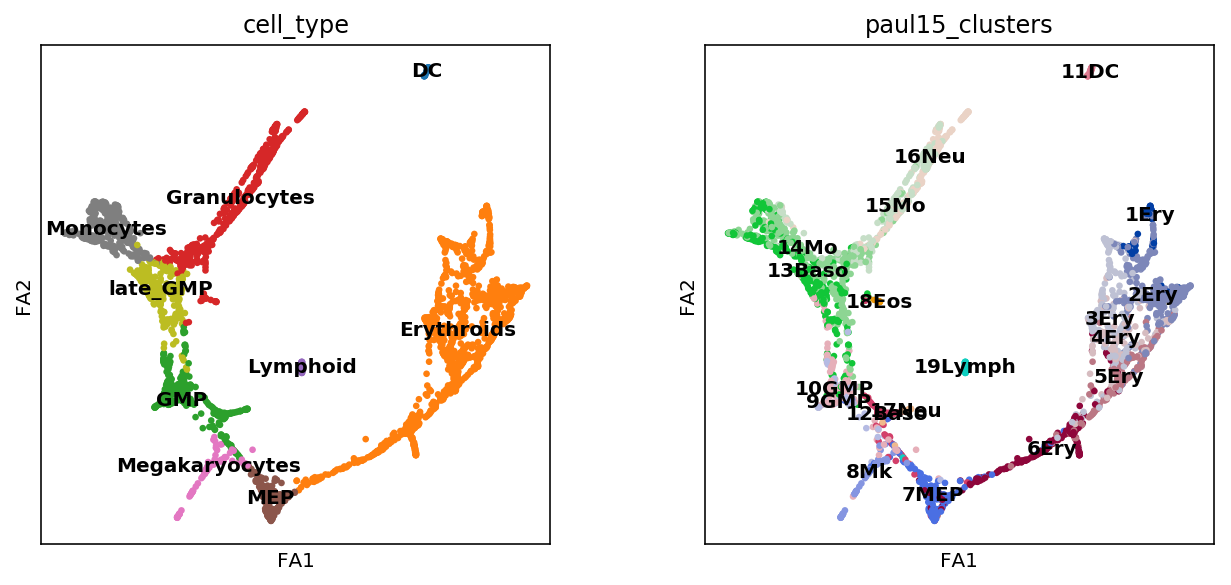

In [24]:
# check results
sc.pl.draw_graph(adata, color=['cell_type', 'paul15_clusters'],
                 legend_loc='on data')

## 10.2. Make annotation (2)
We'll also annotate the indivisual Louvain clusters.

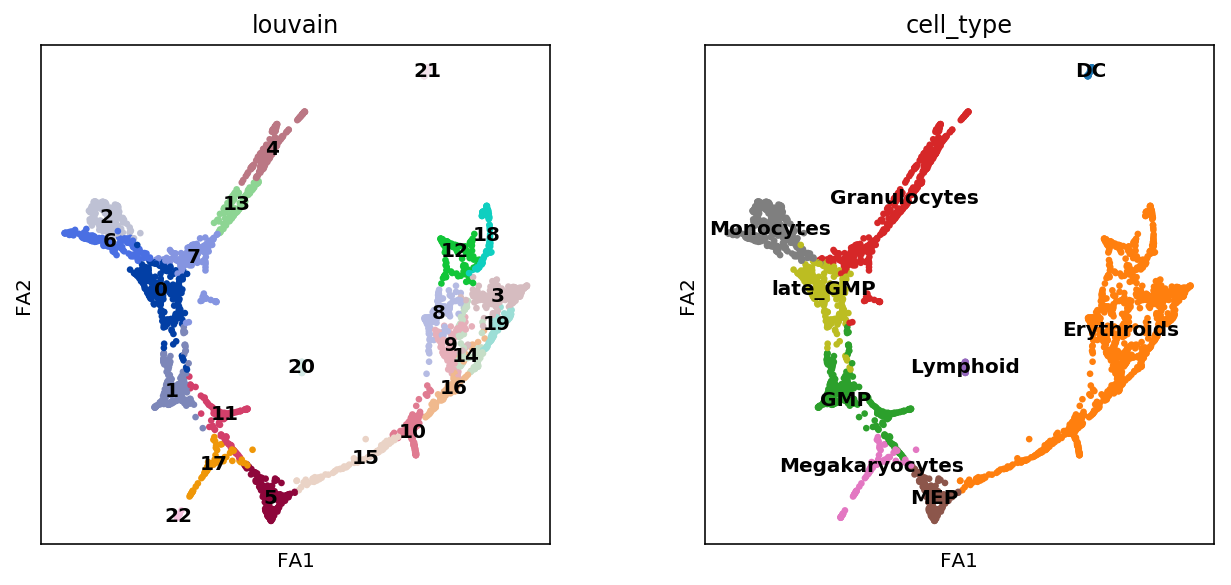

In [25]:
sc.pl.draw_graph(adata, color=['louvain', 'cell_type'],
                 legend_loc='on data')

#### !! Please change the dictionary below depending on the clustering results. The results may change depending on the execution environment.

In [26]:
annotation_2 = {'5': 'MEP_0',
                '15': 'Ery_0',
                '10': 'Ery_1',
                '16': 'Ery_2',
                '14': 'Ery_3',
                '9': 'Ery_4',
                '8': 'Ery_5',
                '19': 'Ery_6',
                '3': 'Ery_7',
                '12': 'Ery_8',
                '18': 'Ery_9',
                '17': 'Mk_0',
                '22': 'Mk_0',
                '11': 'GMP_0',
                '1': 'GMP_1',
                '0': 'GMPl_0',
                '7': 'Gran_0',
                '13': 'Gran_1',
                '4': 'Gran_2',
                '6': 'Mo_0',
                '2': 'Mo_1',
                '21': 'DC_0',
                '20': 'Lym_0'}

In [27]:
adata.obs["louvain_annot"] = [annotation_2[i] for i in adata.obs.louvain]

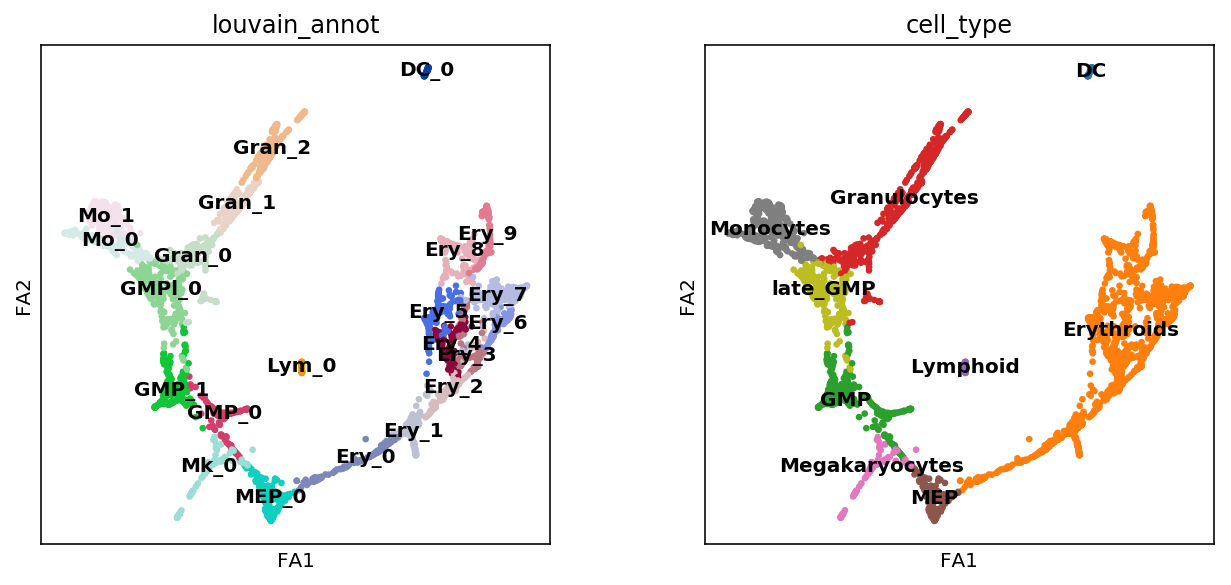

In [28]:
# Check result
sc.pl.draw_graph(adata, color=['louvain_annot', 'cell_type'],
                 legend_loc='on data')

# 11. [Optional step] Subset cells

During the CellOracle analysis, we will focus on the myeloid lineage. Since the othre clusters (i.e. the DC and lymphoid clusters) will not be analyzed, we will choose to remove them now.

It is also important to ensure that the differentiation trajectories are smoothly connected; CellOracle works best with continuous trajectories. If there is discrete cell cluster or non-related cell contamination, please remove them prior to celloracle analysis.

In [29]:
adata.obs.cell_type.unique()

[MEP, Monocytes, Erythroids, Granulocytes, late_GMP, GMP, Megakaryocytes, Lymphoid, DC]
Categories (9, object): [MEP, Monocytes, Erythroids, Granulocytes, ..., GMP, Megakaryocytes, Lymphoid, DC]

In [30]:
cell_of_interest = adata.obs.index[~adata.obs.cell_type.isin(["Lymphoid", "DC"])]
adata = adata[cell_of_interest, :]

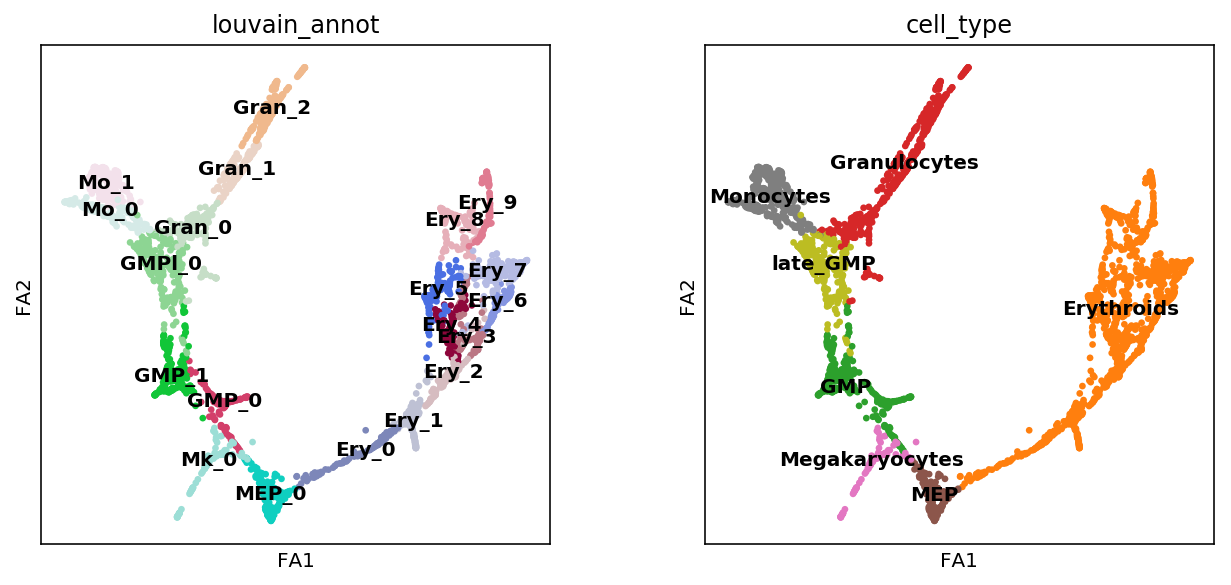

In [31]:
# check result
sc.pl.draw_graph(adata, color=['louvain_annot', 'cell_type'],
                 legend_loc='on data')

# 12. Save processed data

In [ ]:
adata.write_h5ad("Paul_etal_15.h5ad")